In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent = 4)

In [2]:
import joblib
from skimage.io import imread
from skimage.transform  import resize

In [3]:
def resize_all(src, pklname, include, width = 150, height=None):
    height = height if height is not None else width
    
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []
    
    pklname = f"{pklname}_{width}x{height}px.pkl"
    
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src,subdir)
            
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height))
                    data['label'].append(subdir[6:])
                    data['filename'].append(file)
                    data['data'].append(im)
                    
        joblib.dump(data, pklname)
        

In [ ]:
import random
d = dict()
d['data'] = []
d['label'] = []
for i in range(100):
    num_c = random.randint(1,8)
    num_r = random.randint(1,30)
    pp = f"D:/ashikh/work/CV/English/Img/GoodImg/Bmp/Sample00{num_c}/Sample{num_c}-{num_r}.png"
    subdir_1 = [i for i in pp.split('/')]
    im = imread(pp)
    im = resize(im, (80,80))
    d['data'].append(im)
    d['label'].append(subdir_1[-2][6:])

In [ ]:
X = np.array(d['data'])
#y = np.array(d['label'])

In [ ]:
X_test_gray = grayify.transform(X)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [ ]:
my_numbers = ['001','002','003','004','005','006','007','008','009', '010']
result_numbers = []'0','1','2','3','4','5','6','7','8','9']
y_pred = sgd_clf.predict(X_test_prepared)
for i in range(len(my_numbers)):
    if str(y_pred[0]) == my_numbers[i]:
        print(result_numbers[i])


In [ ]:
cPickle.dump(sgd_clf, open("D:/ashikh/work/CV/English/scikit_model/model3.sav", 'wb'))

In [ ]:
loaded_model = cPickle.load(open("D:/ashikh/work/CV/English/scikit_model/model3.sav", 'rb'))

In [ ]:
yyy = loaded_model.predict(X_test_prepared)

In [4]:
data_path = "D:/ashikh/work/CV/English/Img/GoodImg/Bmp"
len(os.listdir(data_path))

62

In [5]:
base_name = 'animal_faces'
width = 80
#include = {'ChickenHead', 'BearHead', 'ElephantHead', 
#           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
include = {'Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005',
            'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010'}
resize_all(src=data_path, pklname=base_name, width=width, include=include)

Sample001
Sample002
Sample003
Sample004
Sample005
Sample006
Sample007
Sample008
Sample009
Sample010


In [6]:
from collections import Counter

In [7]:
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')

In [ ]:
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels: ', np.unique(data['label']))
Counter(data['label'])

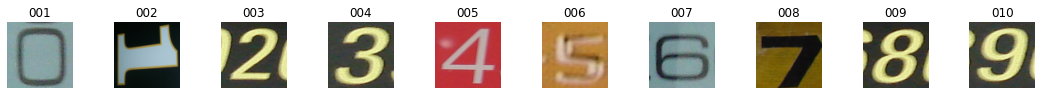

In [8]:
labels = np.unique(data['label'])

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [9]:
X = np.array(data['data'])
y = np.array(data['label'])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    shuffle = True,
    random_state = 42,
)

In [ ]:
def plot_bar(y, loc = 'left', relative = True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
        
    unique, counts = np.unique(y, return_counts = True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
    
    if relative:
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        counts = counts[sorted_index]
        ylabel_text = 'count'
        
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align = 'center', alpha = .7, width = width)
    plt.xticks(xtemp, unique, rotation = 45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc = 'left')
plot_bar(y_test, loc = 'right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)),
    'test ({0} photos)'.format(len(y_test))
])

In [ ]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(8, 8), 
    cells_per_block=(3,3), 
    orientations=8, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)

print(X_train_prepared.shape)

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42, max_iter = 1000, tol = 1e-3)
sgd_clf.fit(X_train, y_train)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [ ]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [ ]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:50])
print(' ')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

In [ ]:
y_pred[1]

In [ ]:
y_test[2]

In [ ]:
import _pickle as cPickle

In [ ]:
with open('D:/ashikh/work/CV/English/mymodel3/mymodel_sklern_char_az.pkl', 'wb') as fid:
    cPickle.dump(sgd_clf, fid)